In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import pearsonr

In [2]:
Crime_data = pd.read_csv('/Users/supriyasardana/Documents/George Mason/AIT-580/Final Project/Crime_Data_from_2010_to_2019.csv')

In [56]:
Crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1048575 non-null  int64  
 1   Date Rptd       1048575 non-null  object 
 2   DATE OCC        1048575 non-null  object 
 3   TIME OCC        1048575 non-null  int64  
 4   AREA            1048575 non-null  int64  
 5   AREA NAME       1048575 non-null  object 
 6   Rpt Dist No     1048575 non-null  int64  
 7   Part 1-2        1048575 non-null  int64  
 8   Crm Cd          1048575 non-null  int64  
 9   Crm Cd Desc     1048575 non-null  object 
 10  Mocodes         933676 non-null   object 
 11  Vict Age        1048575 non-null  int64  
 12  Vict Sex        953516 non-null   object 
 13  Vict Descent    953497 non-null   object 
 14  Premis Cd       1048537 non-null  float64
 15  Premis Desc     1048537 non-null  object 
 16  Weapon Used Cd  346765 non-null   fl

In [4]:
Crime_data.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/10 0:00,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/10 0:00,08/09/10 0:00,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/10 0:00,01/05/10 0:00,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/10 0:00,01/02/10 0:00,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
5,100100506,01/05/10 0:00,01/04/10 0:00,1650,1,Central,162,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,AA,Adult Arrest,442.0,NaN,NaN,NaN,700 W 7TH ST,NaN,34.0480,-118.2577
6,100100508,01/08/10 0:00,01/07/10 0:00,2005,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,PICO BL,GRAND AV,34.0389,-118.2643
7,100100509,01/09/10 0:00,01/08/10 0:00,2100,1,Central,157,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,AA,Adult Arrest,230.0,NaN,NaN,NaN,500 CROCKER ST,NaN,34.0435,-118.2427
8,100100510,01/09/10 0:00,01/09/10 0:00,230,1,Central,171,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,800 W OLYMPIC BL,NaN,34.0450,-118.2640
9,100100511,01/09/10 0:00,01/06/10 0:00,2100,1,Central,132,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,200 S OLIVE ST,NaN,34.0538,-118.2488


In [5]:
def summary(x):
    return pd.Series([x.mean(),x.min(),x.max(),x.isnull().sum(),x.std(),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75)],index=['Mean','Min','Max','Missing','std','25%','50%','75%'])

In [6]:
Crime_data_num = [key for key in dict(Crime_data.dtypes) if dict(Crime_data.dtypes)[key] in ['float64','int64']]

In [7]:
Crime_data_num

['DR_NO',
 'TIME OCC',
 'AREA ',
 'Rpt Dist No',
 'Part 1-2',
 'Crm Cd',
 'Vict Age',
 'Premis Cd',
 'Weapon Used Cd',
 'Crm Cd 1',
 'Crm Cd 2',
 'Crm Cd 3',
 'Crm Cd 4',
 'LAT',
 'LON']

In [8]:
Crime_data_num= Crime_data[Crime_data_num]

In [9]:
Crime_data_num.head(5)

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
0,1307355,1350,13,1385,2,900,48,501.0,NaN,900.0,NaN,NaN,NaN,33.9825,-118.2695
1,11401303,45,14,1485,2,740,0,101.0,NaN,740.0,NaN,NaN,NaN,33.9599,-118.3962
2,70309629,1515,13,1324,2,946,0,103.0,NaN,946.0,NaN,NaN,NaN,34.0224,-118.2524
3,90631215,150,6,646,2,900,47,101.0,102.0,900.0,998.0,NaN,NaN,34.1016,-118.3295
4,100100501,2100,1,176,1,122,47,103.0,400.0,122.0,NaN,NaN,NaN,34.0387,-118.2488


In [5]:
Crime_data.shape

(1048575, 28)

In [8]:
Crime_data.shape[1]

28

In [11]:
Crime_data_num.apply(lambda x:summary(x))

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
Mean,1.229642e+08,1361.196153,11.192859,1165.590224,1.462387,509.037812,31.637757,317.591134,371.653838,508.936362,960.515549,9.707126e+02,9.685000e+02,34.050631,-118.261236
Min,1.208575e+06,1.000000,1.000000,100.000000,1.000000,110.000000,-10.000000,101.000000,101.000000,110.000000,210.000000,9.900000e+01,4.210000e+02,0.000000,-118.827900
Max,9.102204e+08,2359.000000,21.000000,2198.000000,2.000000,956.000000,114.000000,958.000000,516.000000,999.000000,999.000000,9.990000e+02,9.990000e+02,34.790700,0.000000
Missing,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,701810.000000,4.000000,983652.000000,1.047444e+06,1.048537e+06,0.000000,0.000000
std,1.599363e+07,645.781758,5.957323,595.735260,0.498583,212.011332,20.274972,210.258291,113.091170,211.944591,113.677151,8.724692e+01,9.981571e+01,0.992774,3.425154
25%,1.108013e+08,930.000000,6.000000,646.000000,1.000000,330.000000,20.000000,102.000000,400.000000,330.000000,998.000000,9.980000e+02,9.980000e+02,34.009000,-118.437900
50%,1.214114e+08,1430.000000,12.000000,1207.000000,1.000000,440.000000,31.000000,218.000000,400.000000,440.000000,998.000000,9.980000e+02,9.980000e+02,34.063600,-118.331000
75%,1.321130e+08,1900.000000,16.000000,1676.000000,2.000000,626.000000,46.000000,501.000000,400.000000,626.000000,998.000000,9.980000e+02,9.980000e+02,34.179700,-118.278300


In [57]:
(Crime_data.isnull().sum()/Crime_data.shape[0])*100

DR_NO              0.000000
Date Rptd          0.000000
DATE OCC           0.000000
TIME OCC           0.000000
AREA               0.000000
AREA NAME          0.000000
Rpt Dist No        0.000000
Part 1-2           0.000000
Crm Cd             0.000000
Crm Cd Desc        0.000000
Mocodes           10.957633
Vict Age           0.000000
Vict Sex           9.065541
Vict Descent       9.067353
Premis Cd          0.003624
Premis Desc        0.003624
Weapon Used Cd    66.929881
Weapon Desc       66.929976
Status             0.000191
Status Desc        0.000000
Crm Cd 1           0.000381
Crm Cd 2          93.808454
Crm Cd 3          99.892139
Crm Cd 4          99.996376
LOCATION           0.000000
Cross Street      83.539566
LAT                0.000000
LON                0.000000
dtype: float64

# Removing records and columns with missing value

In [58]:
#Crm Cd2, Crm Cd3, Crm cd4, Cross Street has missing data, deleting them,Dr_No has lots of unique value 
Crime_data.drop(columns=['DR_NO','DATE OCC','Part 1-2','Rpt Dist No','Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street','Weapon Used Cd','Weapon Desc','Mocodes','Premis Cd','Premis Desc'],inplace=True)

In [59]:
Crime_data.head()

,Date Rptd,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,02/20/2010 12:00:00 AM,1350,13,Newton,900,VIOLATION OF COURT ORDER,48,M,H,AA,Adult Arrest,900.0,300 E GAGE AV,33.9825,-118.2695
1,09/13/2010 12:00:00 AM,45,14,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,IC,Invest Cont,740.0,SEPULVEDA BL,33.9599,-118.3962
2,08/09/10 0:00,1515,13,Newton,946,OTHER MISCELLANEOUS CRIME,0,M,H,IC,Invest Cont,946.0,1300 E 21ST ST,34.0224,-118.2524
3,01/05/10 0:00,150,6,Hollywood,900,VIOLATION OF COURT ORDER,47,F,W,IC,Invest Cont,900.0,CAHUENGA BL,34.1016,-118.3295
4,01/03/10 0:00,2100,1,Central,122,"RAPE, ATTEMPTED",47,F,H,IC,Invest Cont,122.0,8TH ST,34.0387,-118.2488


In [60]:
Crime_data.shape

(1048575, 15)

In [61]:
Crime_data.isna().sum()

Date Rptd           0
TIME OCC            0
AREA                0
AREA NAME           0
Crm Cd              0
Crm Cd Desc         0
Vict Age            0
Vict Sex        95059
Vict Descent    95078
Status              2
Status Desc         0
Crm Cd 1            4
LOCATION            0
LAT                 0
LON                 0
dtype: int64

In [62]:
Crime_data.dropna(inplace=True)

In [63]:
Crime_data.isna().sum()

Date Rptd       0
TIME OCC        0
AREA            0
AREA NAME       0
Crm Cd          0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Status          0
Status Desc     0
Crm Cd 1        0
LOCATION        0
LAT             0
LON             0
dtype: int64

In [18]:
Crime_data.isna().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Premis Desc     0
Status          0
Status Desc     0
Crm Cd 1        0
LOCATION        0
LAT             0
LON             0
dtype: int64

In [66]:
#Moving clean data to csv file
Crime_data.to_csv('/Users/supriyasardana/Documents/George Mason/AIT-580/Final Project/Crime_Data_from_2010_to_2019_clean1_data.csv', index=False)

In [67]:
pd.read_csv('/Users/supriyasardana/Documents/George Mason/AIT-580/Final Project/Crime_Data_from_2010_to_2019_clean1_data.csv')

,Date Rptd,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,02/20/2010 12:00:00 AM,1350,13,Newton,900,VIOLATION OF COURT ORDER,48,M,H,AA,Adult Arrest,900.0,300 E GAGE AV,33.9825,-118.2695
1,09/13/2010 12:00:00 AM,45,14,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,IC,Invest Cont,740.0,SEPULVEDA BL,33.9599,-118.3962
2,08/09/10 0:00,1515,13,Newton,946,OTHER MISCELLANEOUS CRIME,0,M,H,IC,Invest Cont,946.0,1300 E 21ST ST,34.0224,-118.2524
3,01/05/10 0:00,150,6,Hollywood,900,VIOLATION OF COURT ORDER,47,F,W,IC,Invest Cont,900.0,CAHUENGA BL,34.1016,-118.3295
4,01/03/10 0:00,2100,1,Central,122,"RAPE, ATTEMPTED",47,F,H,IC,Invest Cont,122.0,8TH ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953484,06/10/15 0:00,2000,2,Rampart,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",24,F,H,AO,Adult Other,956.0,1900 LOS ANGELES ST,34.0552,-118.2675
953485,12/20/2015 12:00:00 AM,125,5,Harbor,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",19,M,H,IC,Invest Cont,230.0,1300 N AVALON BL,33.7888,-118.2631
953486,04/30/2015 12:00:00 AM,2100,8,West LA,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",32,M,W,IC,Invest Cont,740.0,10300 MISSISSIPPI AV,34.0558,-118.4193
953487,12/30/2015 12:00:00 AM,307,7,Wilshire,310,BURGLARY,0,M,X,IC,Invest Cont,310.0,400 S SAN VICENTE BL,34.0715,-118.3764


In [3]:
Crime_data=pd.read_csv('/Users/supriyasardana/Documents/George Mason/AIT-580/Final Project/Crime_Data_from_2010_to_2019_clean_data1.csv')

In [7]:
Crime_data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
Crime_data.head()

,Date.Rptd,TIME.OCC,AREA,AREA.NAME,Crm.Cd,Crm.Cd.Desc,Vict.Age,Vict.Sex,Vict.Descent,Premis.Cd,Premis.Desc,Status,Status.Desc,Crm.Cd.1,LOCATION,LAT,LON,Crime_date,SeriousCrime
0,02/20/2010 12:00:00 AM,1350,13,Newton,900,VIOLATION OF COURT ORDER,48,M,H,501,SINGLE FAMILY DWELLING,AA,Adult Arrest,900,300 E GAGE AV,33.9825,-118.2695,2010,0
1,09/13/2010 12:00:00 AM,45,14,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,101,STREET,IC,Invest Cont,740,SEPULVEDA BL,33.9599,-118.3962,2010,0
2,08/09/10 0:00,1515,13,Newton,946,OTHER MISCELLANEOUS CRIME,0,M,H,103,ALLEY,IC,Invest Cont,946,1300 E 21ST ST,34.0224,-118.2524,2010,0
3,01/05/10 0:00,150,6,Hollywood,900,VIOLATION OF COURT ORDER,47,F,W,101,STREET,IC,Invest Cont,900,CAHUENGA BL,34.1016,-118.3295,2010,0
4,01/03/10 0:00,2100,1,Central,122,"RAPE, ATTEMPTED",47,F,H,103,ALLEY,IC,Invest Cont,122,8TH ST,34.0387,-118.2488,2010,1


In [79]:
Crime_data['Crm Cd Desc'].unique()

array(['VIOLATION OF COURT ORDER',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'OTHER MISCELLANEOUS CRIME', 'RAPE, ATTEMPTED',
       'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'BURGLARY FROM VEHICLE',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BATTERY - SIMPLE ASSAULT', 'ROBBERY', 'BOMB SCARE',
       'CHILD NEGLECT (SEE 300 W.I.C.)',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'ATTEMPTED ROBBERY',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'BURGLARY', 'ARSON',
       'RAPE, FORCIBLE', 'BRANDISH WEAPON',
       'THROWING OBJECT AT MOVING VEHICLE',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
       'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
       'SHOTS FIRED AT INHABITED DWELLING',
       'THEFT FROM MOTOR

In [36]:
Crime_data.corr()

,TIME OCC,Crm Cd,Vict Age,Crm Cd 1,LAT,LON
TIME OCC,1.000000,0.021249,-0.032302,0.021311,0.001081,-0.000471
Crm Cd,0.021249,1.000000,-0.064247,0.999709,-0.000283,0.001882
Vict Age,-0.032302,-0.064247,1.000000,-0.064081,0.001577,-0.002204
Crm Cd 1,0.021311,0.999709,-0.064081,1.000000,-0.000230,0.001823
LAT,0.001081,-0.000283,0.001577,-0.000230,1.000000,-0.994678
LON,-0.000471,0.001882,-0.002204,0.001823,-0.994678,1.000000


<AxesSubplot:>

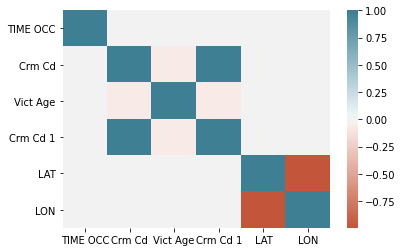

In [38]:
sns.heatmap(Crime_data.corr(),cmap=sns.diverging_palette(20, 220, n=200))

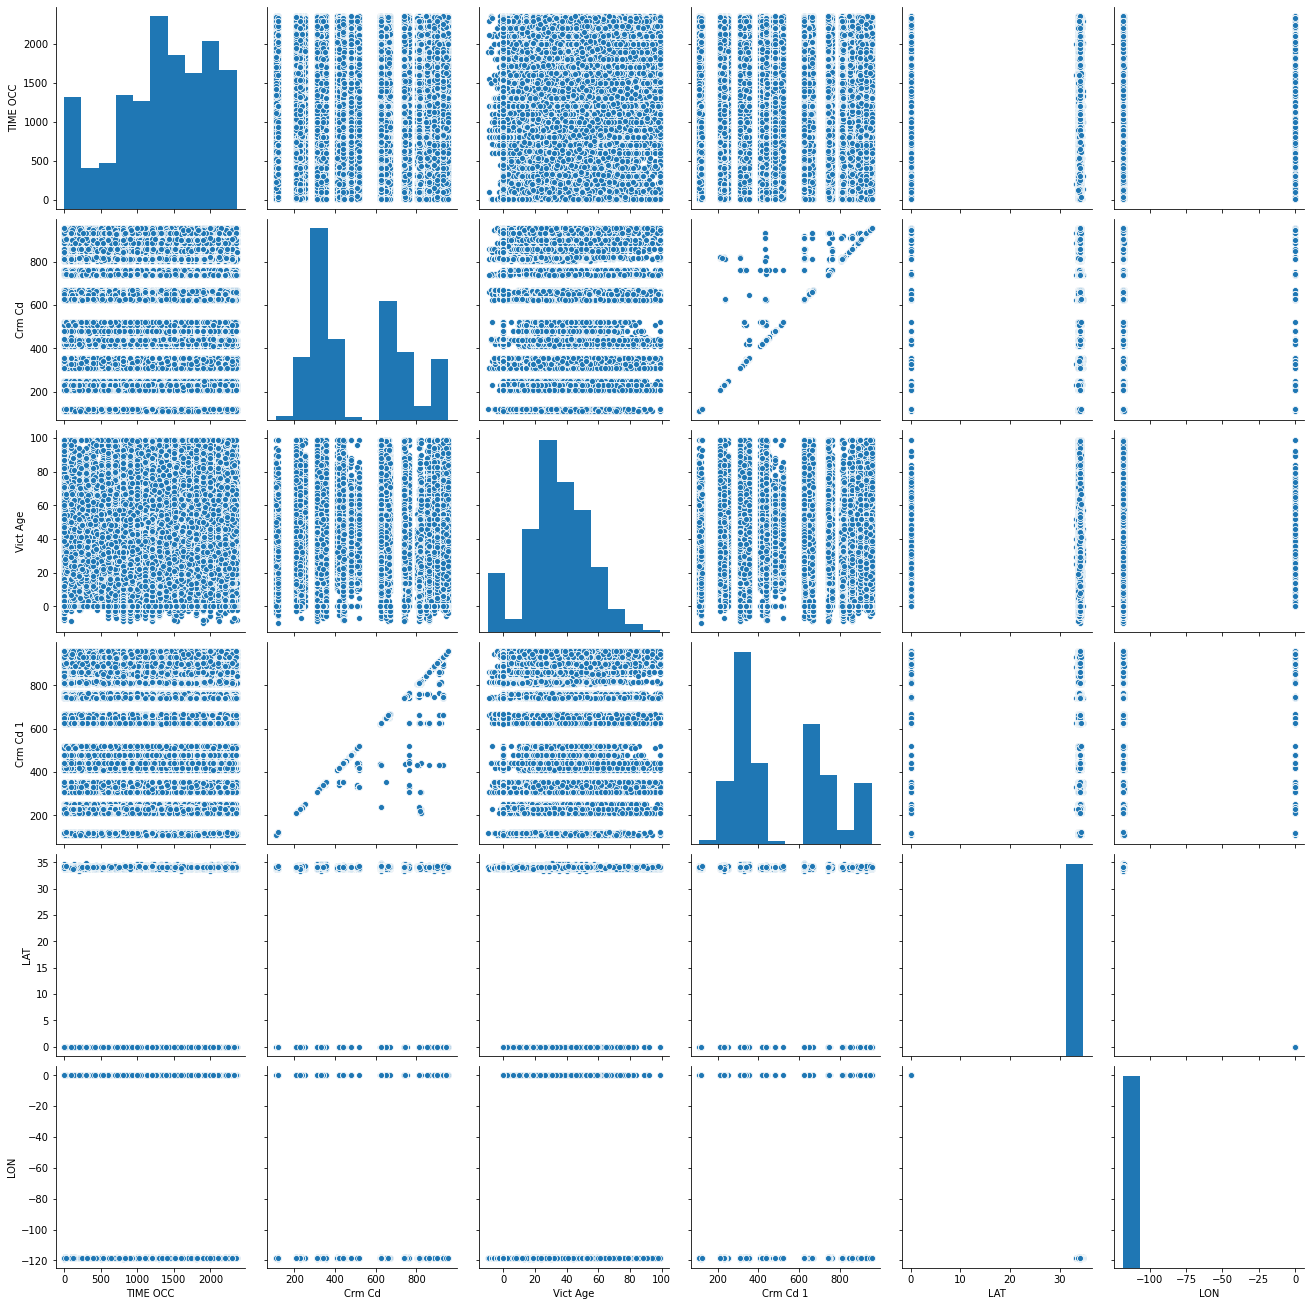

In [44]:
g=sns.pairplot(Crime_data , height=3)

In [45]:
g.fig.set_size_inches(15,15)

# 1. In which areas, LA has high crime rates?

In [47]:
Crime_data_location= pd.DataFrame(Crime_data['AREA NAME'].value_counts())
Crime_data_location.reset_index(inplace=True)
Crime_data_location.columns=['AreaName','Count']

In [48]:
Crime_data_location

,AreaName,Count
0,77th Street,67017
1,Southwest,62967
2,N Hollywood,52722
3,Southeast,49990
4,Pacific,48989
5,Mission,48751
6,Van Nuys,46810
7,Northeast,45975
8,Devonshire,45501
9,Topanga,45109


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

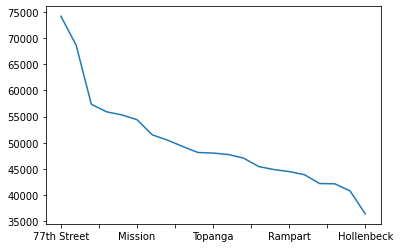

In [6]:
Crime_data['AREA NAME'].value_counts().plot()

Text(0.5, 1.0, 'Top Locations of LA with high crime rate (2010-2019)')

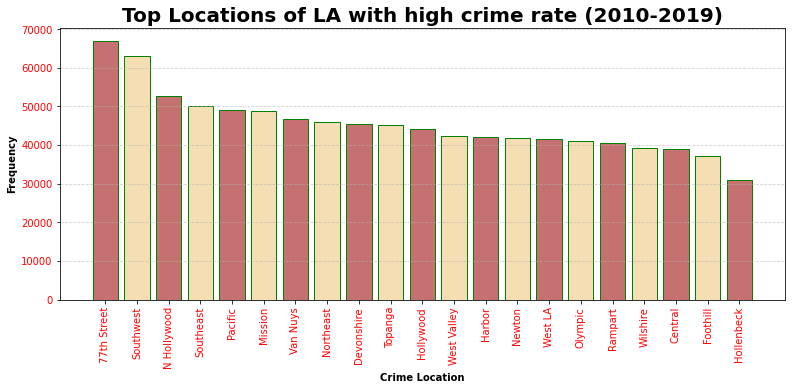

In [39]:
#my_colors = ('gyc','#CAFF70')
my_colors=('#C67171','#F5DEB3')

#('#54FF9F','#CAFF70')

plt.figure(figsize=(13,5))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.bar(Crime_data_location['AreaName'], Crime_data_location['Count'], color=my_colors, edgecolor='green')
plt.xticks(Crime_data_location['AreaName'], rotation=90, color='red')
plt.yticks(color='red')
plt.xlabel('Crime Location', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.title('Top Locations of LA with high crime rate (2010-2019)', fontsize=20, weight='bold')


In [51]:
Crime_data_location1=Crime_data_location['AreaName']
for i in Crime_data_location1:
    i = str(i)
    
    tokens = i.split()
    

    comment_words += " ".join(tokens)+" "
    
wordcloud1 = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(comment_words)

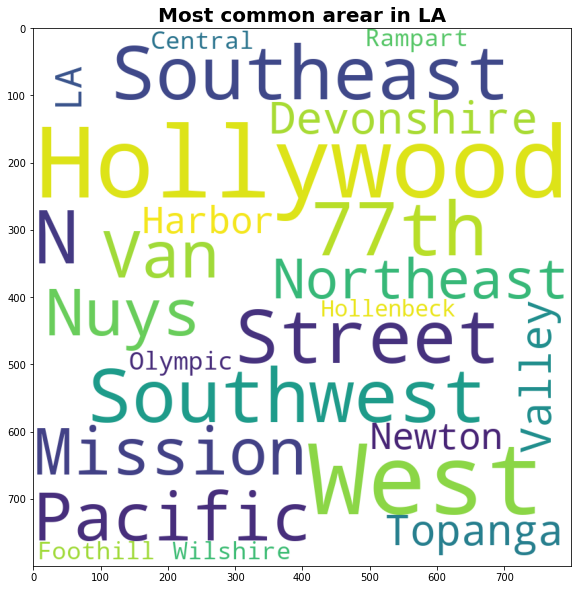

In [53]:
plt.figure(figsize=(8,8), facecolor=None)
plt.title('Most common arear in LA',fontsize=20, weight='bold')
plt.imshow(wordcloud1)
plt.tight_layout(pad=0)

# 2. Which type of crime is more in number?

In [11]:
Type_Of_Crime = pd.DataFrame(Crime_data['Crm Cd'].value_counts())
Type_Of_Crime.reset_index(inplace=True)
Type_Of_Crime.columns=['Crime_Code','Count']

In [13]:
Type_Of_Crime.head(20)

,Crime_Code,Count
0,624,101662
1,330,81362
2,310,78948
3,440,77258
4,354,70683
5,626,55166
6,745,50126
7,740,49116
8,210,41795
9,230,41478


In [14]:
Type_Of_Crime1 = pd.DataFrame(Crime_data['Crm Cd Desc'].value_counts())
Type_Of_Crime1.reset_index(inplace=True)
Type_Of_Crime1.columns=['Crime_Name','Count']

In [15]:
Type_Of_Crime1.head(20)

,Crime_Name,Count
0,BATTERY - SIMPLE ASSAULT,101662
1,BURGLARY FROM VEHICLE,81362
2,BURGLARY,78948
3,THEFT PLAIN - PETTY ($950 & UNDER),77258
4,THEFT OF IDENTITY,70683
5,INTIMATE PARTNER - SIMPLE ASSAULT,55166
6,VANDALISM - MISDEAMEANOR ($399 OR UNDER),50126
7,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",49116
8,ROBBERY,41795
9,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",41478


In [46]:
Type_Of_Crime['Crime_Code'].head(10).astype(str)

0    624
1    330
2    310
3    440
4    354
5    626
6    745
7    740
8    210
9    230
Name: Crime_Code, dtype: object

Text(0.5, 1.0, 'Top 10 crime in LA (2010-2019)')

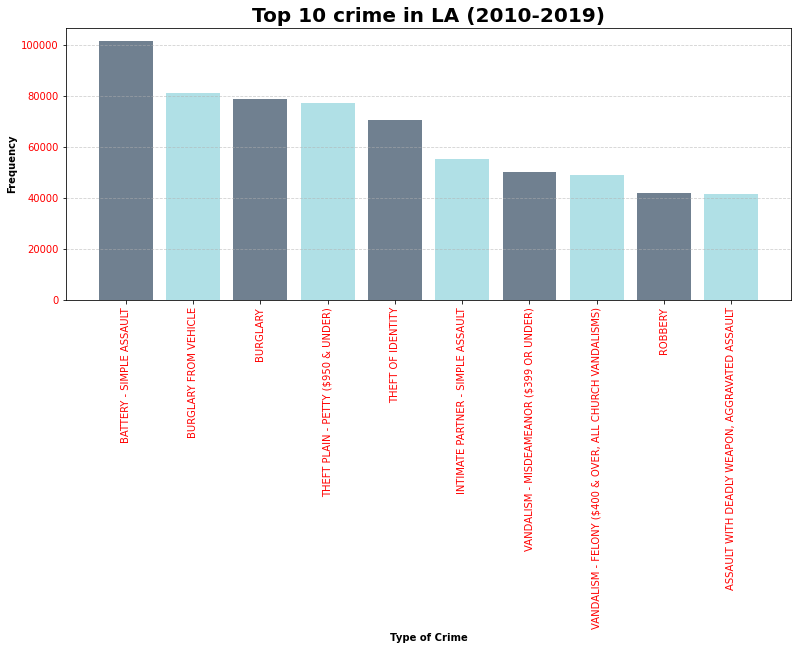

In [65]:
my_colors_2 = 'gy'

plt.figure(figsize=(13,5))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.bar(Type_Of_Crime['Crime_Code'].head(10).astype(str),Type_Of_Crime['Count'].head(10),color=['slategray', 'powderblue'])
plt.xticks(['624','330','310','440','354','626','745','740','210','230'],Type_Of_Crime1['Crime_Name'].head(10), rotation=90, color='red')
plt.yticks(color='red')
plt.xlabel('Type of Crime',weight='bold', size=10)
plt.ylabel('Frequency',weight='bold', size=10)
plt.title('Top 10 crime in LA (2010-2019)',fontsize=20, weight='bold')

In [50]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

In [26]:
Type_Of_Crime2=Type_Of_Crime1['Crime_Name']

In [36]:
for i in Type_Of_Crime2:
    i = str(i)
    
    tokens = i.split()
    

    comment_words += " ".join(tokens)+" "
    #print(comment_words)
    
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(comment_words)

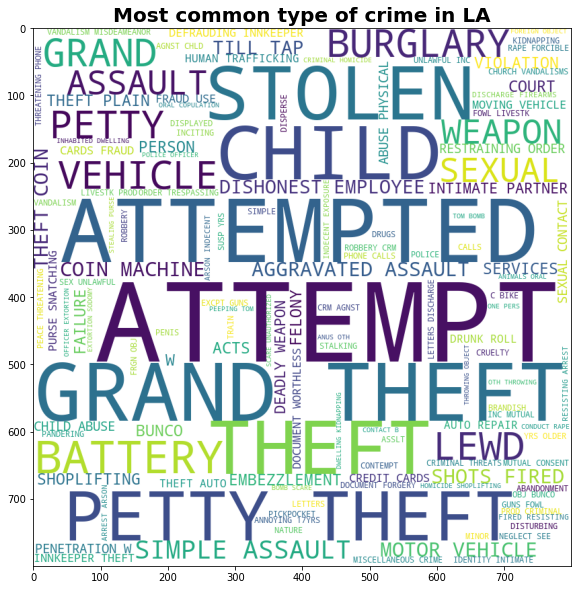

In [67]:
plt.figure(figsize=(8,8), facecolor=None)
plt.title('Most common type of crime in LA',fontsize=20, weight='bold')
plt.imshow(wordcloud)
plt.tight_layout(pad=0)

# 3. Which age group is at larger risk?

In [87]:
Crime_data['Vict Age'].value_counts()

 0     76310
 25    24218
 24    23964
 23    23925
 26    23474
       ...  
-6        22
-7        16
-8         9
-9         7
-10        1
Name: Vict Age, Length: 109, dtype: int64

In [88]:
#As age can't be negative, removing rows with age greater than 0

Crime_data_na=Crime_data.drop(Crime_data[Crime_data['Vict Age']<0].index)
Crime_data_na

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Crime_Date_month,Year
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,501.0,SINGLE FAMILY DWELLING,AA,Adult Arrest,900.0,300 E GAGE AV,33.9825,-118.2695,02,2010
1,11401303,09/13/2010 12:00:00 AM,09/12/10 0:00,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,101.0,STREET,IC,Invest Cont,740.0,SEPULVEDA BL,33.9599,-118.3962,09,2010
2,70309629,08/09/10 0:00,08/09/10 0:00,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,103.0,ALLEY,IC,Invest Cont,946.0,1300 E 21ST ST,34.0224,-118.2524,08,2010
3,90631215,01/05/10 0:00,01/05/10 0:00,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,101.0,STREET,IC,Invest Cont,900.0,CAHUENGA BL,34.1016,-118.3295,01,2010
4,100100501,01/03/10 0:00,01/02/10 0:00,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,103.0,ALLEY,IC,Invest Cont,122.0,8TH ST,34.0387,-118.2488,01,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048567,150212802,06/10/15 0:00,06/09/15 0:00,2000,2,Rampart,257,2,956,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",...,102.0,SIDEWALK,AO,Adult Other,956.0,1900 LOS ANGELES ST,34.0552,-118.2675,06,2015
1048569,150519669,12/20/2015 12:00:00 AM,12/20/2015 12:00:00 AM,125,5,Harbor,517,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,108.0,PARKING LOT,IC,Invest Cont,230.0,1300 N AVALON BL,33.7888,-118.2631,12,2015
1048570,150808971,04/30/2015 12:00:00 AM,04/29/2015 12:00:00 AM,2100,8,West LA,836,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,740.0,10300 MISSISSIPPI AV,34.0558,-118.4193,04,2015
1048571,150718967,12/30/2015 12:00:00 AM,12/30/2015 12:00:00 AM,307,7,Wilshire,722,1,310,BURGLARY,...,210.0,RESTAURANT/FAST FOOD,IC,Invest Cont,310.0,400 S SAN VICENTE BL,34.0715,-118.3764,12,2015


In [89]:
Crime_data_na['Vict Age'].sort_values()

226851     0
66473      0
66470      0
869862     0
503049     0
          ..
394790    99
215497    99
264294    99
21996     99
498046    99
Name: Vict Age, Length: 953050, dtype: int64

In [90]:
Crime_data_age=pd.DataFrame(Crime_data_na['Vict Age'].value_counts())
Crime_data_age.reset_index(inplace=True)
Crime_data_age.columns=['Victim Age','Count']
Crime_data_age.head(10)

,Victim Age,Count
0,0,76310
1,25,24218
2,24,23964
3,23,23925
4,26,23474
5,27,23134
6,28,22769
7,22,22656
8,29,22526
9,30,22032


In [92]:
cut_bins = [-1,10,20,30,40,60,70,80,90,100,110]
cut_bins_age=[1,2,3,4,5,6,7,8,9,10]
Crime_data_age['age_bins']=pd.cut(Crime_data_age['Victim Age'], bins=cut_bins, labels=cut_bins_age)
Crime_data_age.head(10)

,Victim Age,Count,age_bins
0,0,76310,1
1,25,24218,3
2,24,23964,3
3,23,23925,3
4,26,23474,3
5,27,23134,3
6,28,22769,3
7,22,22656,3
8,29,22526,3
9,30,22032,3


In [93]:
Crime_data_age['age_bins'].value_counts()

5     20
8     10
7     10
6     10
4     10
3     10
2     10
1     10
9      9
10     0
Name: age_bins, dtype: int64

In [99]:
Crime_data_bin=pd.DataFrame(Crime_data_age.groupby(['age_bins'],as_index=False)['Count'].sum())
Crime_data_bin['AgeGroup']=['0-10','11-20','21-30','31-40','41-60','61-70','71-80','81-90','91-100','101-110']
Crime_data_bin

,age_bins,Count,AgeGroup
0,1,90449,0-10
1,2,92363,11-20
2,3,229601,21-30
3,4,188658,31-40
4,5,272218,41-60
5,6,50963,61-70
6,7,19310,71-80
7,8,7883,81-90
8,9,1605,91-100
9,10,0,101-110


In [122]:
Crime_data_bin['AgeGroup']

0       0-10
1      11-20
2      21-30
3      31-40
4      41-60
5      61-70
6      71-80
7      81-90
8     91-100
9    101-110
Name: AgeGroup, dtype: object

Text(0.5, 1.0, 'Count of Victim age group(2010-2019)')

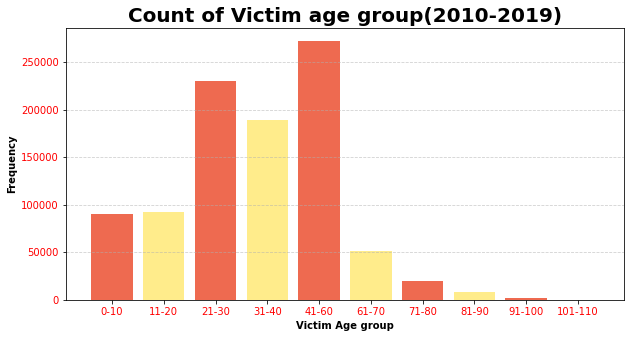

In [132]:
my_colors_1=('#EE6A50','#FFEC8B')
plt.figure(figsize=(10,5))
plt.bar(Crime_data_bin['age_bins'],Crime_data_bin['Count'], color=my_colors_1)
plt.grid(linestyle='--', axis='y', alpha=0.6)
plt.xticks([1,2,3,4,5,6,7,8,9,10],Crime_data_bin['AgeGroup'],color='red')
plt.yticks(color='red')
plt.xlabel('Victim Age group', weight='bold', size=10)
plt.ylabel('Frequency', weight='bold', size=10)
plt.title('Count of Victim age group(2010-2019)', fontsize=20, weight='bold')


# 5. Which part of the day is safe to step out i.e. which time period is safer or which time period is more insecure?

In [10]:
Crime_data.head()

,Date.Rptd,TIME.OCC,AREA,AREA.NAME,Crm.Cd,Crm.Cd.Desc,Vict.Age,Vict.Sex,Vict.Descent,Premis.Cd,Premis.Desc,Status,Status.Desc,Crm.Cd.1,LOCATION,LAT,LON,Crime_date,SeriousCrime
0,02/20/2010 12:00:00 AM,1350,13,Newton,900,VIOLATION OF COURT ORDER,48,M,H,501,SINGLE FAMILY DWELLING,AA,Adult Arrest,900,300 E GAGE AV,33.9825,-118.2695,2010,0
1,09/13/2010 12:00:00 AM,45,14,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,101,STREET,IC,Invest Cont,740,SEPULVEDA BL,33.9599,-118.3962,2010,0
2,08/09/10 0:00,1515,13,Newton,946,OTHER MISCELLANEOUS CRIME,0,M,H,103,ALLEY,IC,Invest Cont,946,1300 E 21ST ST,34.0224,-118.2524,2010,0
3,01/05/10 0:00,150,6,Hollywood,900,VIOLATION OF COURT ORDER,47,F,W,101,STREET,IC,Invest Cont,900,CAHUENGA BL,34.1016,-118.3295,2010,0
4,01/03/10 0:00,2100,1,Central,122,"RAPE, ATTEMPTED",47,F,H,103,ALLEY,IC,Invest Cont,122,8TH ST,34.0387,-118.2488,2010,1


In [134]:
Crime_data['Crime_Type']=Crime_data['Crm Cd Desc'].str[:18]

In [135]:
Crime_data[['TIME OCC','Crime_Type']]

,TIME OCC,Crime_Type
0,1350,VIOLATION OF COURT
1,45,VANDALISM - FELONY
2,1515,OTHER MISCELLANEOU
3,150,VIOLATION OF COURT
4,2100,"RAPE, ATTEMPTED"
...,...,...
1048567,2000,"LETTERS, LEWD -"
1048569,125,ASSAULT WITH DEADL
1048570,2100,VANDALISM - FELONY
1048571,307,BURGLARY


In [11]:
Crime_data['Hour_Crime']=Crime_data['TIME.OCC'].apply(lambda x: format(x,"04")).str[:2]b

In [12]:
#Moving clean data to csv file
Crime_data.to_csv('/Users/supriyasardana/Documents/George Mason/AIT-580/Final Project/Crime_Data_from_2010_to_2019_clean_data2.csv')

In [136]:
Crime_data_Time=pd.DataFrame()
Crime_data_Time['Hour_Crime']=Crime_data['TIME OCC'].apply(lambda x: format(x,"04")).str[:2]

In [139]:
Crime_data_Time

,Hour_Crime,Crime_Type,Crime_Code
0,13,VIOLATION OF COURT,900
1,00,VANDALISM - FELONY,740
2,15,OTHER MISCELLANEOU,946
3,01,VIOLATION OF COURT,900
4,21,"RAPE, ATTEMPTED",122
...,...,...,...
1048567,20,"LETTERS, LEWD -",956
1048569,01,ASSAULT WITH DEADL,230
1048570,21,VANDALISM - FELONY,740
1048571,03,BURGLARY,310


In [162]:
Crime_data_Time_1=pd.DataFrame(Crime_data_Time['Hour_Crime'].value_counts())
Crime_data_Time_1.reset_index(inplace=True)
Crime_data_Time_1.columns=['Time','Count']
Crime_data_Time_1=Crime_data_Time_1.sort_values(by='Time')
Crime_data_Time_1

,Time,Count
14,00,41337
17,01,27614
19,02,23107
20,03,16503
22,04,12010
23,05,10492
21,06,15540
18,07,24101
11,08,42405
16,09,37200


Text(0.5, 1.0, 'Relationship of time period and crime in LA (2010-2019)')

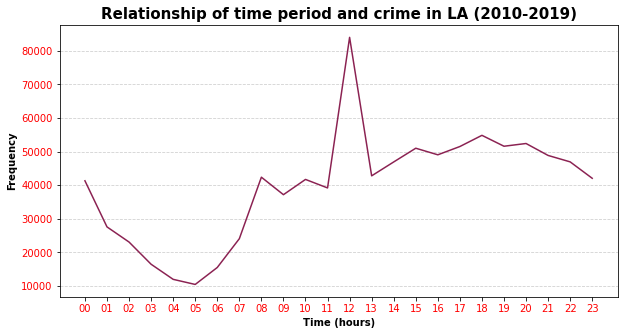

In [164]:
my_colors_1=('#EE6A50','#FFEC8B')
plt.figure(figsize=(10,5))
plt.plot(Crime_data_Time_1['Time'],Crime_data_Time_1['Count'], color='#8B2252')
plt.grid(linestyle='--', axis='y', alpha=0.6)
plt.xticks(color='red')
plt.yticks(color='red')
plt.xlabel('Time (hours)', weight='bold', size=10)
plt.ylabel('Frequency', weight='bold', size=10)
plt.title('Relationship of time period and crime in LA (2010-2019)', fontsize=15, weight='bold')

In [138]:
Crime_data_Time['Crime_Type']=Crime_data['Crime_Type']
Crime_data_Time['Crime_Code']=Crime_data['Crm Cd']

In [171]:
Crime_data_Time

,Hour_Crime,Crime_Type,Crime_Code
0,13,VIOLATION OF COURT,900
1,00,VANDALISM - FELONY,740
2,15,OTHER MISCELLANEOU,946
3,01,VIOLATION OF COURT,900
4,21,"RAPE, ATTEMPTED",122
...,...,...,...
1048567,20,"LETTERS, LEWD -",956
1048569,01,ASSAULT WITH DEADL,230
1048570,21,VANDALISM - FELONY,740
1048571,03,BURGLARY,310


In [196]:
Crime_data_Time_3=pd.DataFrame(Crime_data_Time.groupby(['Hour_Crime','Crime_Code'],as_index=False).count())
Crime_data_Time_3.columns=('Hour','CrimeCode','Count')
Crime_data_Time_3

,Hour,CrimeCode,Count
0,00,110,113
1,00,121,493
2,00,122,35
3,00,210,1782
4,00,220,242
...,...,...,...
2655,23,950,2
2656,23,951,62
2657,23,952,1
2658,23,954,6


In [203]:
Crime_data_Time_4=pd.DataFrame(Crime_data_Time_3[Crime_data_Time_3.Hour=='00'].sort_values(by='Count', ascending=False).head(20))
Crime_data_Time_4

,Hour,CrimeCode,Count
23,00,354,7698
46,00,624,3716
14,00,330,3422
48,00,626,2707
5,00,230,2230
64,00,740,2217
65,00,745,2080
3,00,210,1782
34,00,440,1731
12,00,310,1722


In [80]:
my_colors_1=('#EE6A50','#FFEC8B')
plt.figure(figsize=(10,5))
plt.bar(Crime_data_Time_4['CrimeCode'],Crime_data_Time_4['Count'], color=my_colors_1)
plt.grid(linestyle='--', axis='y', alpha=0.6)
#plt.xticks([1,2,3,4,5,6,7,8,9,10],Crime_data_bin['AgeGroup'],color='red')
plt.yticks(color='red')
#plt.xlabel('Victim Age group', weight='bold', size=10)
#plt.ylabel('Frequency', weight='bold', size=10)
#plt.title('Count of Victim age group(2010-2019)', fontsize=20, weight='bold')

NameError: name 'Crime_data_Time_4' is not defined

<Figure size 720x360 with 0 Axes>

# 6. Is any particular ethnicity being targeted by criminals?

In [45]:
Crime_data['Vict Descent'].value_counts()

H    366359
W    264728
B    172540
O     99827
A     23588
X     18789
K      4912
F      1361
I       410
C       345
J       173
P       169
U        92
V        63
Z        40
G        35
S        17
D        13
L         7
-         1
Name: Vict Descent, dtype: int64

In [20]:
Crime_data['Crime_Date_month']=Crime_data['Date Rptd'].str[:2]
Crime_data['Year']=Crime_data['Date Rptd'].str[6:10]

In [21]:
Crime_data['Year']=Crime_data['Year'].replace(['15 0'],'2015')
Crime_data['Year']=Crime_data['Year'].replace(['10 0'],'2010')
Crime_data['Year']=Crime_data['Year'].replace(['19 0'],'2019')
Crime_data['Year']=Crime_data['Year'].replace(['18 0'],'2018')
Crime_data['Year']=Crime_data['Year'].replace(['11 0'],'2011')
Crime_data['Year']=Crime_data['Year'].replace(['14 0'],'2014')
Crime_data['Year']=Crime_data['Year'].replace(['17 0'],'2017')
Crime_data['Year']=Crime_data['Year'].replace(['20 0'],'2020')
Crime_data['Year']=Crime_data['Year'].replace(['21 0'],'2021')
Crime_data['Year']=Crime_data['Year'].replace(['12 0'],'2012')
Crime_data['Year']=Crime_data['Year'].replace(['13 0'],'2013')
Crime_data['Year']=Crime_data['Year'].replace(['16 0'],'2016')

In [207]:
Crime_data['Year'].unique()

array(['2010', '2019', '2011', '2016', '2012', '2013', '2014', '2015',
       '2017', '2018', '2020', '2021'], dtype=object)

In [22]:
Crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Crime_Date_month,Year
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,501.0,SINGLE FAMILY DWELLING,AA,Adult Arrest,900.0,300 E GAGE AV,33.9825,-118.2695,02,2010
1,11401303,09/13/2010 12:00:00 AM,09/12/10 0:00,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,101.0,STREET,IC,Invest Cont,740.0,SEPULVEDA BL,33.9599,-118.3962,09,2010
2,70309629,08/09/10 0:00,08/09/10 0:00,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,103.0,ALLEY,IC,Invest Cont,946.0,1300 E 21ST ST,34.0224,-118.2524,08,2010
3,90631215,01/05/10 0:00,01/05/10 0:00,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,101.0,STREET,IC,Invest Cont,900.0,CAHUENGA BL,34.1016,-118.3295,01,2010
4,100100501,01/03/10 0:00,01/02/10 0:00,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,103.0,ALLEY,IC,Invest Cont,122.0,8TH ST,34.0387,-118.2488,01,2010


In [52]:
pearsonr(Crime_data['Crime_Date_month'].astype('category').cat.codes, Crime_data['Vict Descent'].astype('category').cat.codes)

(-0.0005233344364021476, 0.6093418598421623)

In [53]:
Crime_data[['Crime_Date_month','Vict Descent']].groupby(['Vict Descent','Crime_Date_month']).agg({'Crime_Date_month':'count'})

Crime_Date_month
Vict Descent Crime_Date_month                  
-            05                               1
A            01                            2009
             02                            1741
             03                            2019
             04                            1889
...                                         ...
Z            08                               5
             09                               5
             10                               4
             11                               3
             12                               2

[212 rows x 1 columns]

In [54]:
Crime_data_Ethinicity = Crime_data[['Year','Vict Descent','DR_NO']].groupby(['Vict Descent','Year'],as_index=False).agg({'DR_NO':'count'})

In [55]:
Crime_data_Ethinicity.columns

Index(['Vict Descent', 'Year', 'DR_NO'], dtype='object')

In [56]:
Crime_data_Ethinicity.rename(columns={'DR_NO':"Total"},inplace=True)

In [57]:
Crime_data_Ethinicity.rename(columns={'Vict Descent':"Ethinicity"},inplace=True)

In [58]:
Crime_data_Ethinicity.sort_values(by='Total', ascending=False).head(20)

,Ethinicity,Year,Total
59,H,2010,70170
61,H,2012,69785
60,H,2011,69340
63,H,2014,68354
62,H,2013,66409
139,W,2010,51547
141,W,2012,51460
140,W,2011,50640
142,W,2013,48349
143,W,2014,47326


In [210]:
Crime_data_Ethinicity

,Ethinicity,Year,Total
0,-,2012,1
1,A,2010,4228
2,A,2011,4319
3,A,2012,4432
4,A,2013,4415
...,...,...,...
164,Z,2011,4
165,Z,2012,4
166,Z,2013,11
167,Z,2014,7


In [59]:
pivot_Crime_data_Ethinicity = Crime_data_Ethinicity.pivot(index='Ethinicity', columns='Year', values='Total')

In [209]:
pivot_Crime_data_Ethinicity

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Ethinicity,,,,,,,,,,,,
-,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,4228.0,4319.0,4432.0,4415.0,4666.0,1327.0,97.0,27.0,39.0,29.0,8.0,1.0
B,32563.0,32041.0,33253.0,31902.0,32897.0,8573.0,555.0,288.0,198.0,146.0,102.0,22.0
C,78.0,62.0,63.0,71.0,51.0,17.0,2.0,NaN,NaN,NaN,1.0,NaN
D,4.0,4.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
F,254.0,261.0,259.0,278.0,219.0,66.0,7.0,7.0,2.0,2.0,5.0,1.0
G,3.0,8.0,4.0,3.0,11.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN
H,70170.0,69340.0,69785.0,66409.0,68354.0,18949.0,1337.0,682.0,497.0,465.0,321.0,50.0
I,74.0,75.0,72.0,86.0,70.0,30.0,1.0,NaN,NaN,2.0,NaN,NaN


<BarContainer object of 20 artists>

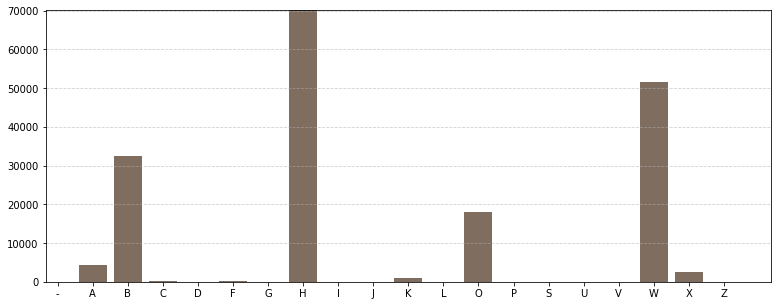

In [85]:

plt.figure(figsize=(13,5))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.bar(pivot_Crime_data_Ethinicity.index, pivot_Crime_data_Ethinicity['2010'],color='#7f6d5f')
plt.bar(pivot_Crime_data_Ethinicity.index, pivot_Crime_data_Ethinicity['2011'], bottom=pivot_Crime_data_Ethinicity['2010'],color='#557f2d')
#plt.bar(pivot_Crime_data_Ethinicity.index, pivot_Crime_data_Ethinicity['2012'], bottom=pivot_Crime_data_Ethinicity['2011'], color='red')




#plt.bar(pivot_Crime_data_Ethinicity['Ethinicity'],stacked=True)
#pivot_Crime_data_Ethinicity.plot.bar(stacked=True)
#plt.xticks(Crime_data_location['AreaName'], rotation=90, color='red')
#plt.yticks(color='red')
#plt.xlabel('Crime Location', weight='bold')
#plt.ylabel('Frequency', weight='bold')
#plt.title('Top Locations of LA with high crime rate (2010-2019)', fontsize=20, weight='bold')

<AxesSubplot:xlabel='Ethinicity'>

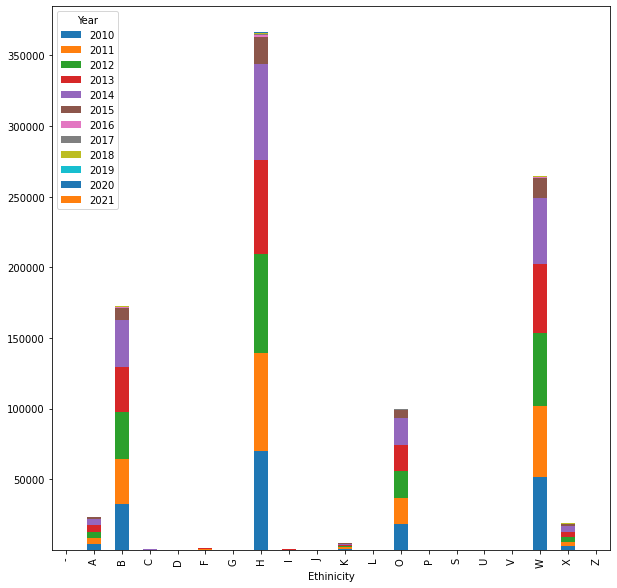

In [63]:
pivot_Crime_data_Ethinicity.plot.bar(stacked=True, figsize=(10,10))

In [43]:
pd.DataFrame(Crime_data_Ethinicity.sort_values(by='Total', ascending=False).head(20))

Total
Vict Descent Year       
H            2010  70172
             2012  69787
             2011  69342
             2014  68356
             2013  66409
W            2010  51553
             2012  51461
             2011  50641
             2013  48350
             2014  47327
B            2012  33254
             2014  32897
             2010  32565
             2011  32044
             2013  31904
O            2014  19075
H            2015  18950
O            2012  18819
             2013  18803
             2011  18646

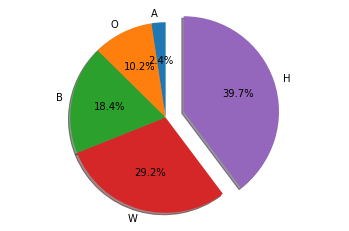

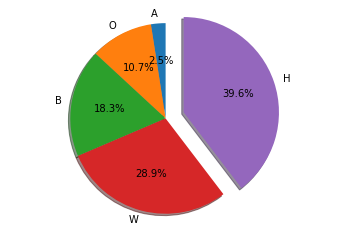

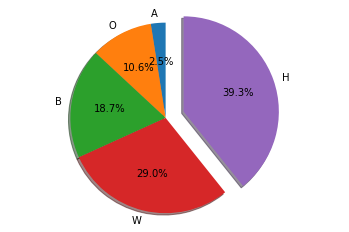

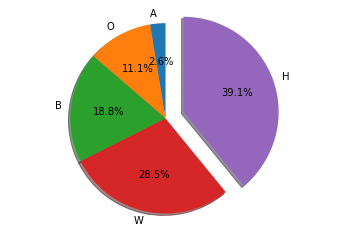

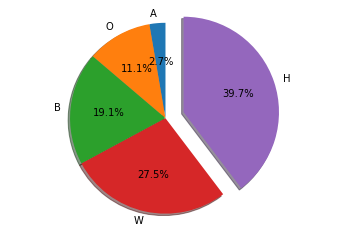

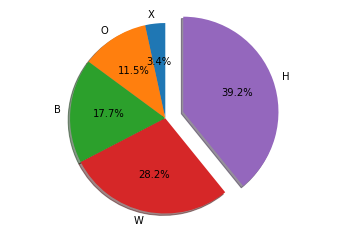

In [241]:
explode = (0, 0, 0, 0,0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(pivot_Crime_data_Ethinicity['2010'].fillna(0).sort_values().tail(5), explode=explode, labels=pivot_Crime_data_Ethinicity['2010'].fillna(0).sort_values().index[15:20], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


fig1, ax2 = plt.subplots()
ax2.pie(pivot_Crime_data_Ethinicity['2011'].fillna(0).sort_values().tail(5), explode=explode, labels=pivot_Crime_data_Ethinicity['2011'].fillna(0).sort_values().index[15:20], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


fig1, ax2 = plt.subplots()
ax2.pie(pivot_Crime_data_Ethinicity['2012'].fillna(0).sort_values().tail(5), explode=explode, labels=pivot_Crime_data_Ethinicity['2012'].fillna(0).sort_values().index[15:20], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



fig1, ax2 = plt.subplots()
ax2.pie(pivot_Crime_data_Ethinicity['2013'].fillna(0).sort_values().tail(5), explode=explode, labels=pivot_Crime_data_Ethinicity['2013'].fillna(0).sort_values().index[15:20], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



fig1, ax2 = plt.subplots()
ax2.pie(pivot_Crime_data_Ethinicity['2014'].fillna(0).sort_values().tail(5), explode=explode, labels=pivot_Crime_data_Ethinicity['2014'].fillna(0).sort_values().index[15:20], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



fig1, ax2 = plt.subplots()
ax2.pie(pivot_Crime_data_Ethinicity['2015'].fillna(0).sort_values().tail(5), explode=explode, labels=pivot_Crime_data_Ethinicity['2015'].fillna(0).sort_values().index[15:20], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

In [212]:
pivot_Crime_data_Ethinicity.index

Index(['-', 'A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'O', 'P',
       'S', 'U', 'V', 'W', 'X', 'Z'],
      dtype='object', name='Ethinicity')

In [222]:
pivot_Crime_data_Ethinicity['2010'].fillna(0).sort_values().tail(7)

Ethinicity
K      975.0
X     2516.0
A     4228.0
O    18038.0
B    32563.0
W    51547.0
H    70170.0
Name: 2010, dtype: float64

In [235]:
pivot_Crime_data_Ethinicity['2010'].fillna(0).sort_values().index[13:20]

Index(['K', 'X', 'A', 'O', 'B', 'W', 'H'], dtype='object', name='Ethinicity')

MAP

In [6]:
Crime_data.head(5)

,Date.Rptd,TIME.OCC,AREA,AREA.NAME,Crm.Cd,Crm.Cd.Desc,Vict.Age,Vict.Sex,Vict.Descent,Premis.Cd,Premis.Desc,Status,Status.Desc,Crm.Cd.1,LOCATION,LAT,LON,Crime_date,SeriousCrime
0,02/20/2010 12:00:00 AM,1350,13,Newton,900,VIOLATION OF COURT ORDER,48,M,H,501,SINGLE FAMILY DWELLING,AA,Adult Arrest,900,300 E GAGE AV,33.9825,-118.2695,2010,0
1,09/13/2010 12:00:00 AM,45,14,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,101,STREET,IC,Invest Cont,740,SEPULVEDA BL,33.9599,-118.3962,2010,0
2,08/09/10 0:00,1515,13,Newton,946,OTHER MISCELLANEOUS CRIME,0,M,H,103,ALLEY,IC,Invest Cont,946,1300 E 21ST ST,34.0224,-118.2524,2010,0
3,01/05/10 0:00,150,6,Hollywood,900,VIOLATION OF COURT ORDER,47,F,W,101,STREET,IC,Invest Cont,900,CAHUENGA BL,34.1016,-118.3295,2010,0
4,01/03/10 0:00,2100,1,Central,122,"RAPE, ATTEMPTED",47,F,H,103,ALLEY,IC,Invest Cont,122,8TH ST,34.0387,-118.2488,2010,1


In [5]:
lat = Crime_data['LAT'].values
lon = Crime_data['LON'].values

In [7]:
area = Crime_data['AREA.NAME'].values
CrimeType = Crime_data['Crm.Cd'].values

In [15]:
#from mpl_toolkits.basemap import Basemap

import mpl_toolkits as mp

In [9]:

fig = plt.figure(figsize=(8, 8))
m = mp.(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'